In [96]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [108]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


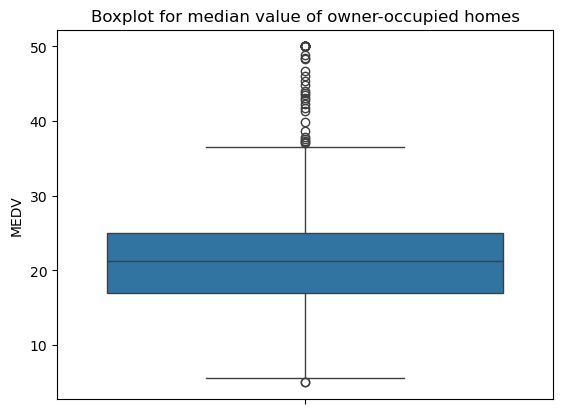

In [98]:
#For the Median value of owner-occupied homes provide a boxplot
ax = sns.boxplot(boston_df['MEDV']).set_title('Boxplot for median value of owner-occupied homes')
plt.show()


Text(0.5, 1.0, 'Charles river variable distribution bar plot')

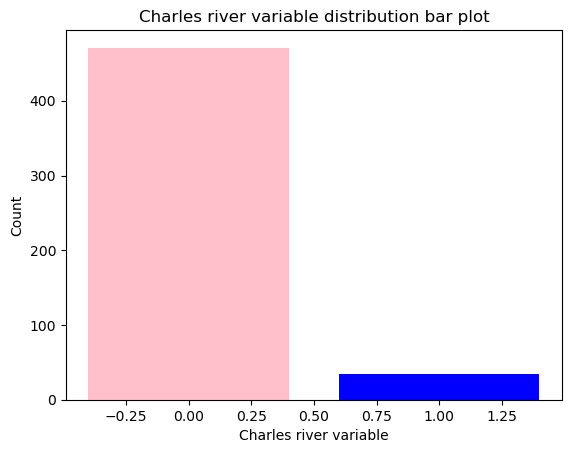

In [99]:
#Provide a  bar plot for the Charles river variable
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['pink','blue'])
plt.xlabel('Charles river variable')
plt.ylabel('Count')
plt.title('Charles river variable distribution bar plot')



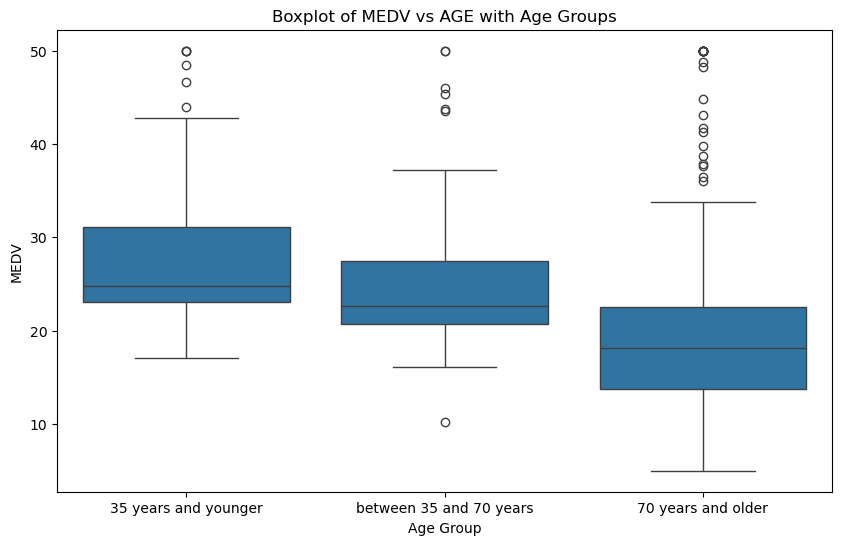

In [100]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Create three age groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE with Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()


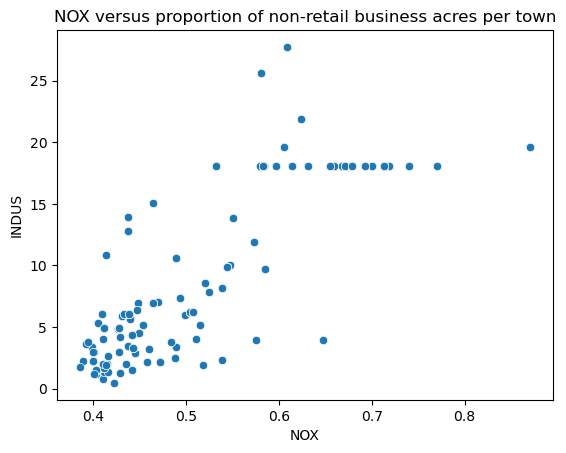

In [101]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df).set_title('NOX versus proportion of non-retail business acres per town')

#Nitric oxide concentrations and the proportion of non-retail business acres seems correlated. 
#The more there are NOX, the more non-retail business there are. 


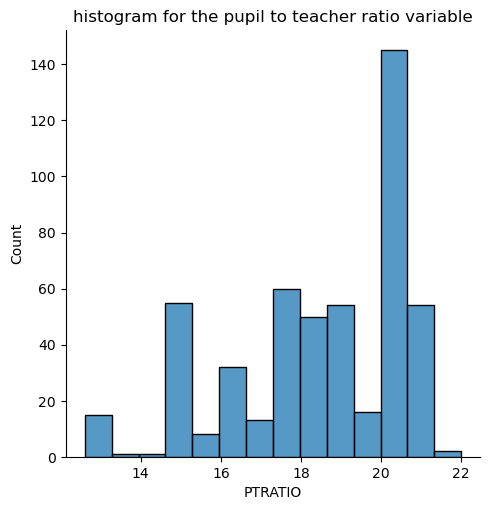

In [102]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(boston_df['PTRATIO'], kde = False)
plt.title('histogram for the pupil to teacher ratio variable')
plt.show()


In [103]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Extract MEDV values for houses bounded and not bounded by Charles River
medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

#H_0: There is no significant difference in median value of houses bounded by the Charles river
#H_1: There is a significant difference in median value of houses bounded by the Charles river

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(medv_bounded, medv_not_bounded)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in median values.')
else:
    print('There is no significant difference in median values.')

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in median values.


In [104]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Create a list of MEDV values for each group of AGE
age_groups = boston_df['AGE'].unique()
medv_by_age = [boston_df[boston_df['AGE'] == age_group]['MEDV'] for age_group in age_groups]

#H_0: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#H_1: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*medv_by_age)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in median values.')
else:
    print('There is no significant difference in median values.')

F-statistic: 0.9840091646131573
P-value: 0.5539698276810093
There is no significant difference in median values.


In [109]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#H_0: NOX concentration is not correlated with INDUS
#H_1: NOX concentration is correlated with INDUS

#Since they are both continuous variables we can use a pearson correlation test
f_statistic, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('NOX concentration is correlated with INDUS.')
else:
    print('NOX concentration is not correlated with INDUS')

#Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX concentration and the proportion of non-retail business acres per town.


F-statistic: 0.7636514469209162
P-value: 7.913361061232958e-98
NOX concentration is correlated with INDUS.


In [114]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#H_0: There is no impact of an weighted distance to the five Boston employment centres on the median value of owner occupied homes
#H_1: There is an impact of an weighted distance to the five Boston employment centres on the median value of owner occupied homes

# Add a constant term to the independent variables
X = sm.add_constant(boston_df['DIS'])

# Dependent variable
y = boston_df['MEDV']

# Fit the regression model
model = sm.OLS(y, X).fit()


# Print the regression summary
print('#p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV. In conlusion, there is an impact of an weighted distance to the five Boston employment centres on the median value of owner occupied homes.\n')

print(model.summary())


#p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV. In conlusion, there is an impact of an weighted distance to the five Boston employment centres on the median value of owner occupied homes.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        09:55:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonro